,Description,Value
0,Session id,123
1,Target,WD
2,Target type,Regression
3,Original data shape,"(2136, 7)"
4,Transformed data shape,"(2136, 9)"
5,Transformed train set shape,"(1495, 9)"
6,Transformed test set shape,"(641, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0956,489.3446,22.1211,0.7022,0.2281,0.1132
1,14.5652,461.1797,21.4751,0.7856,0.2200,0.1075
2,19.0793,671.4219,25.9118,0.6152,0.1922,0.1349
3,14.7643,434.2370,20.8384,0.7726,0.2647,0.1135
4,17.7836,676.0236,26.0005,0.6436,0.2664,0.1313
5,16.7998,556.1643,23.5831,0.7476,0.2561,0.1223
6,17.2654,543.1129,23.3048,0.7097,0.2326,0.1274
7,18.2308,705.6212,26.5635,0.7373,0.2496,0.1305
8,19.1057,729.2952,27.0055,0.7393,0.3125,0.1315


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.0940,532.8759,23.0841,0.6757,0.2949,0.1316
1,16.5018,515.7471,22.7101,0.7603,0.3070,0.1190
2,21.3419,778.5318,27.9022,0.5538,0.2964,0.1514
3,16.5107,472.0375,21.7264,0.7528,0.4037,0.1267
4,19.8875,754.8244,27.4741,0.6020,0.2744,0.1496
5,18.5953,624.7332,24.9947,0.7165,0.3832,0.1346
6,20.1762,667.7355,25.8406,0.6431,0.2152,0.1500
7,20.1049,766.1902,27.6801,0.7147,0.3270,0.1457
8,20.7686,824.2744,28.7102,0.7053,0.3211,0.1410


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.2442,483.0852,21.9792,0.7060,0.1699,0.1137
1,14.7831,443.0964,21.0499,0.7941,0.1789,0.1072
2,19.2345,696.8993,26.3989,0.6006,0.1788,0.1351
3,13.8016,389.3921,19.7330,0.7961,0.1902,0.1055
4,17.2759,650.1401,25.4978,0.6572,0.2098,0.1268
5,16.4574,544.1560,23.3272,0.7531,0.2339,0.1191
6,17.2852,540.2350,23.2430,0.7112,0.2055,0.1277
7,18.0155,689.5084,26.2585,0.7433,0.2414,0.1306
8,18.5424,696.8716,26.3983,0.7509,0.2591,0.1251


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,16.7903,572.9498,23.8301,0.7190,0.2044,0.1209,0.7660


   DATETIMEDATA  prediction_label
0    2024-02-28        123.031046
1    2024-02-29        129.134619
2    2024-03-01        148.521549
3    2024-03-02        146.254863
4    2024-03-03        146.132171
5    2024-03-04        141.348482
6    2024-03-05        141.392243
7    2024-03-06        143.829419
8    2024-03-07        149.365636
9    2024-03-08        143.876402
10   2024-03-09        143.933984
11   2024-03-10        145.169427
12   2024-03-11        148.036013
13   2024-03-12        157.896668
14   2024-03-13        154.666875
15   2024-03-14        167.945250
16   2024-03-15        166.096673
17   2024-03-16        150.751206
18   2024-03-17        151.673672
19   2024-03-18        139.347075
20   2024-03-19        134.034600
21   2024-03-20        129.972703
22   2024-03-21        128.637354
23   2024-03-22        132.609371
24   2024-03-23        129.883197
25   2024-03-24        121.658761
26   2024-03-25        126.790019
27   2024-03-26        124.013519
28   2024-03-2

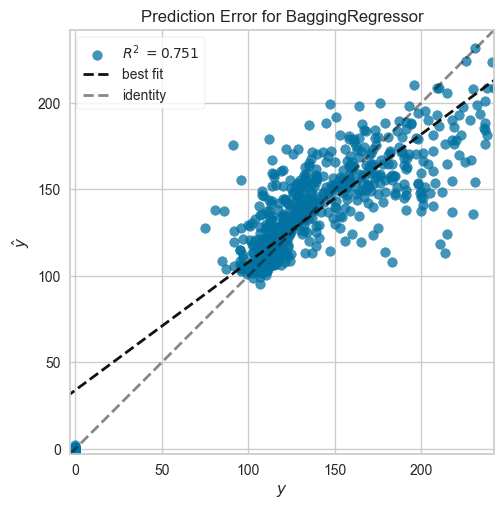

In [1]:
from pycaret.regression import *
import pandas as pd
data = pd.read_csv('csv\pm25_new2.csv')
data = data.drop(['stationID'], axis=1, inplace=False)
data['DATETIMEDATA'] = pd.to_datetime(data['DATETIMEDATA'])

s = setup(data, target = 'WD', session_id = 123, date_features=['DATETIMEDATA'], normalize=True)

lightgbm_model = create_model('lightgbm')
tuned_model = tune_model(lightgbm_model)
ensemble_tuned_model = ensemble_model(tuned_model, method='Bagging')
compare_best_model = compare_models(include=[ensemble_tuned_model])
lastest_date = data['DATETIMEDATA'].max()
start_date = lastest_date + pd.DateOffset(hours=1)
end_date = start_date + pd.DateOffset(days=30, hours=23)
next_week = pd.date_range(start=start_date, end=end_date, freq='D')


next_week_data = pd.DataFrame({'DATETIMEDATA': next_week})

next_week_data['PM25'] = data['PM25'].mean()
next_week_data['O3'] = data['O3'].mean()
next_week_data['WS'] = data['WS'].mean()
next_week_data['TEMP'] = data['TEMP'].mean()
next_week_data['RH'] = data['RH'].mean()


model_predictions = predict_model(compare_best_model, data=next_week_data)
predict_oneweek_data = pd.DataFrame(model_predictions, columns=['DATETIMEDATA', 'prediction_label'])
predict_oneweek_data.to_csv('csv\predicted_WD.csv', index=False)
print(predict_oneweek_data)
save_model(compare_best_model, 'predict_WD')
plot_model(compare_best_model, plot = 'error')

